####  Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

##### Load the given Banknote authentication dataset.  



In [4]:
dataset = pd.read_csv('1fXr31hcEemkYxLyQ1aU1g_50fc36ee697c4b158fe26ade3ec3bc24_Banknote-authentication-dataset-.csv')

In [5]:
dataset.head()

,V1,V2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


In [6]:
dataset.shape

(1372, 2)

##### Calculate statistical measures, e.g. mean and standard deviation. 



In [8]:
dataset.mean()

V1    0.433735
V2    1.922353
dtype: float64

In [9]:
dataset.std()

V1    2.842763
V2    5.869047
dtype: float64

##### Visualise your data as you consider fit. 



Text(0, 0.5, 'V2')

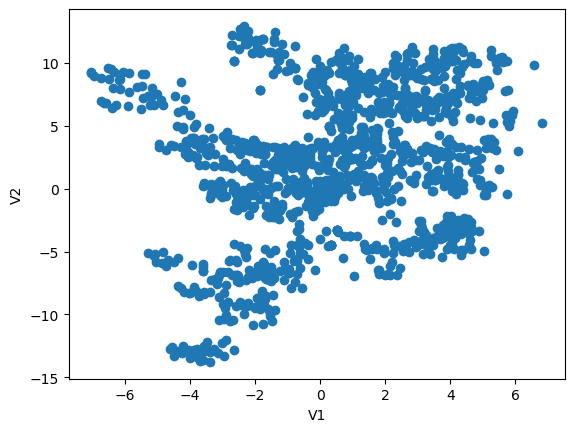

In [11]:
plt.scatter(dataset['V1'], dataset['V2'])
plt.xlabel('V1')
plt.ylabel('V2')

##### Evaluate if the given dataset is suitable for the K-Means clustering task.
- In the dataset, the mean and standard deviation differ for two features, so these two features need to be standardized for the algorithm to perform better.
- The dataset only has two features, which is a good number for the k-means algorithm, as it doesn't work well with many features.
- In the figure, some groups of points can be separated into clouds. This is good for clustering. Also, no outliers are visible in the figure.
- Overall, the dataset is suitable for clustering, but the features need to be normalized.


#### Write a short description of the dataset and your evaluation of its suitability for the K-Means clustering task.
- The dataset has only 2 features
- The dataset contains only 1372 rows.
- Mathematical expectations and standard deviations of these 2 features = (0.433735, 2.842763), (1.922353,5.869047)
- In the dataset, the mean and standard deviation differ for two features, so these two features need to be standardized for the algorithm to perform better.
- The dataset only has two features, which is a good number for the k-means algorithm, as it doesn't work well with many features.
- In the figure, some groups of points can be separated into clouds. This is good for clustering. Also, no outliers are visible in the figure.
- Overall, the dataset is suitable for clustering, but the features need to be normalized.

##### Normalization of features

In [15]:
scaler = MinMaxScaler()
columns_to_scale = ['V1', 'V2']
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])

Text(0, 0.5, 'V2')

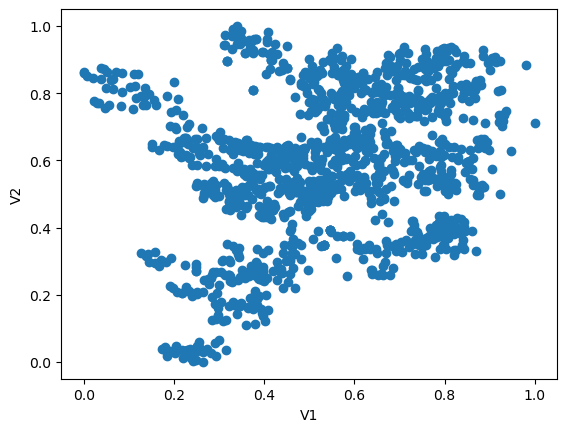

In [16]:
plt.scatter(dataset['V1'], dataset['V2'])
plt.xlabel('V1')
plt.ylabel('V2')

##### Run K-means on the given dataset

In [18]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(dataset)

C:\Users\isazo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

##### Visualise the results. 

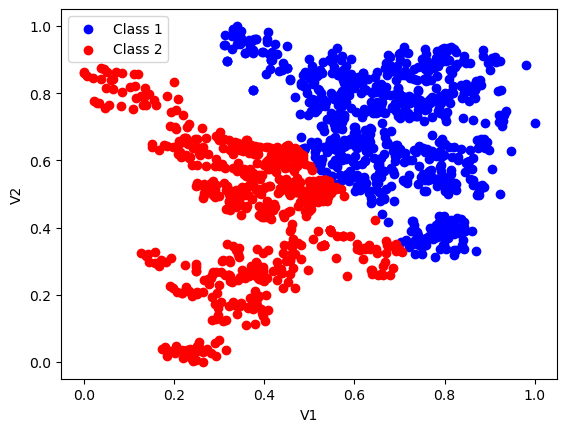

In [20]:
preds = kmeans.predict(dataset)
plt.scatter(dataset['V1'][preds==0], dataset['V2'][preds==0],color='blue',label='Class 1')
plt.scatter(dataset['V1'][preds==1], dataset['V2'][preds==1],color='red',label='Class 2')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend()

##### Re-run K-means several times and visualise the results. 

C:\Users\isazo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\isazo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\isazo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\isazo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

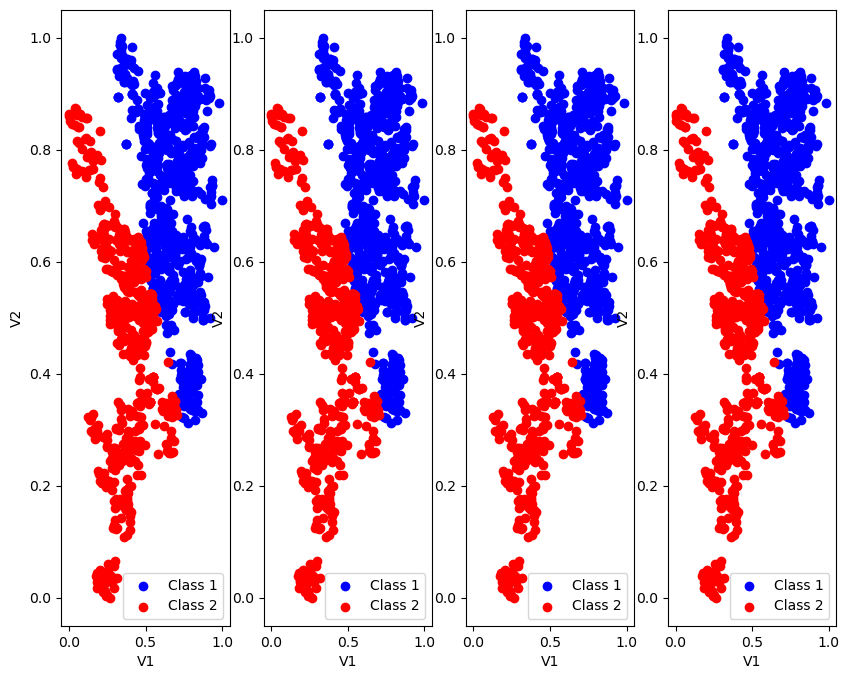

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 8))
for i in range(4):
    
    kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
    kmeans.fit(dataset)
    preds = kmeans.predict(dataset)
    axes[i].scatter(dataset['V1'][preds==0], dataset['V2'][preds==0],color='blue',label='Class 1')
    axes[i].scatter(dataset['V1'][preds==1], dataset['V2'][preds==1],color='red',label='Class 2')
    axes[i].set_xlabel('V1')
    axes[i].set_ylabel('V2')
    axes[i].legend()

##### Compare the results: is the K-means algorithm stable? 
- The results according to the pictures are very stable

##### Describe your results.
- As a result of clustering, the points were divided into two groups.
- The points were separated approximately by the middle of the large cloud.
- During repeated tests, the clusters did not change significantly.